In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix
import warnings
import pickle
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
data=pd.read_csv("Data_Train.csv")
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
data.Date_of_Journey=data.Date_of_Journey.str.split('/')
data.Date_of_Journey

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

FileNotFoundError: ignored

In [ ]:
data=pd.read_csv(r"Data_Train.csv")
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


NameError: ignored

In [ ]:
for i in category:
  print(i,data[i].unique())

NameError: ignored

In [ ]:
data['Date']=data.Date_of_Journey.str[0]
data['Month']=data.Date_of_Journey.str[1]
data['Year']=data.Date_of_Journey.str[2]
data.Total_Stops.unique()
data.Route=data.Route.str.split('->')
data.Route

0                    [BLR ? DEL]
1        [CCU ? IXR ? BBI ? BLR]
2        [DEL ? LKO ? BOM ? COK]
3              [CCU ? NAG ? BLR]
4              [BLR ? NAG ? DEL]
                  ...           
10678                [CCU ? BLR]
10679                [CCU ? BLR]
10680                [BLR ? DEL]
10681                [BLR ? DEL]
10682    [DEL ? GOI ? BOM ? COK]
Name: Route, Length: 10683, dtype: object

In [ ]:
data['City1']=data.Route.str[0]
data['City2']=data.Route.str[1]
data['City3']=data.Route.str[2]
data['City4']=data.Route.str[3]
data['City5']=data.Route.str[4]
data['City6']=data.Route.str[5]

In [ ]:
data.Dep_Time=data.Dep_Time.str.split(':')
data['Dep_Time_Hour']=data.Dep_Time.str[0]
data['Dep_Time_Mins']=data.Dep_Time.str[1]


In [ ]:
data.Arrival_Time=data.Arrival_Time.str.split(' ')

In [ ]:
data['Arrival_date']=data.Arrival_Time.str[1]
data['Time_of_Arrival']=data.Arrival_Time.str[0]
data['Time_of_Arrival']=data.Time_of_Arrival.str.split(':')
data['Arrival_Time_Hour']=data.Time_of_Arrival.str[0]
data['Arrival_Time_Mins']=data.Time_of_Arrival.str[1]

In [ ]:
data.Duration=data.Duration.str.split(' ')


In [ ]:
data['Travel_Hours']=data.Duration.str[0]
data['Travel_Hours']=data['Travel_Hours'].str.split('h')
data['Travel_Hours']=data['Travel_Hours'].str[0]
data.Travel_Hours=data.Travel_Hours
data['Travel_Mins']=data.Duration.str[1]
data.Travel_Mins=data.Travel_Mins.str.split('m')
data.Travel_Mins=data.Duration.str[0]

In [ ]:
data.Total_Stops.replace('non_stop',0,inplace=True)
data.Total_Stops=data.Total_Stops.str.split(' ')
data.Total_Stops=data.Total_Stops.str[0]

In [ ]:
data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
data.Additional_Info.replace('No Info','No Info',inplace=True)

In [ ]:
data.isnull().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    1
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops              1
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
City1                    1
City2                10683
City3                10683
City4                10683
City5                10683
City6                10683
Dep_Time_Hour            0
Dep_Time_Mins            0
Arrival_date          6348
Time_of_Arrival          0
Arrival_Time_Hour        0
Arrival_Time_Mins        0
Travel_Hours             0
Travel_Mins              0
dtype: int64

In [ ]:
data.drop(['City4','City5','City6'],axis=1,inplace=True)
data.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration'],axis=1,inplace=True)
data.drop(['Time_of_Arrival'],axis=1,inplace=True)

In [ ]:
data.isnull().sum()

Airline                  0
Source                   0
Destination              0
Total_Stops              1
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
City1                    1
City2                10683
City3                10683
Dep_Time_Hour            0
Dep_Time_Mins            0
Arrival_date          6348
Arrival_Time_Hour        0
Arrival_Time_Mins        0
Travel_Hours             0
Travel_Mins              0
dtype: int64

In [ ]:
data['City3'].fillna('None,inplae=True')
data['Arrival_Date'].fillna(data['Datedata.Dep_Time_Hur=data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Mins=data.Dep_Time_Mins.astype('int64')
data.Arrival_date=data.Arrival_date.astype('int64')
data.Arrival_Time_Hours=data.Arrival_Time_Hours.astype('int64')
data.Arrival_Time_Mins=data.Arrival_Time_Mins.astype('int64')
data.Travel_Mins=data.Travel_Mins.astype('int64')

SyntaxError: ignored

In [ ]:
data[data['Travel_Hours']=='5m']'],inplace=True)
data['Travel_Mins'].fillna(0,inplace=True)

SyntaxError: ignored

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            10683 non-null  object 
 1   Source             10683 non-null  object 
 2   Destination        10683 non-null  object 
 3   Total_Stops        10682 non-null  object 
 4   Additional_Info    10683 non-null  object 
 5   Price              10683 non-null  int64  
 6   Date               10683 non-null  object 
 7   Month              10683 non-null  object 
 8   Year               10683 non-null  object 
 9   City1              10682 non-null  object 
 10  City2              0 non-null      float64
 11  City3              0 non-null      float64
 12  Dep_Time_Hour      10683 non-null  object 
 13  Dep_Time_Mins      10683 non-null  object 
 14  Arrival_date       4335 non-null   object 
 15  Arrival_Time_Hour  10683 non-null  object 
 16  Arrival_Time_Mins  106

In [ ]:
#data.Date_of_Journey=data.Date_of_Journey.astype('int64')
#data.Month=odata.Month.astype('int64')
#data.Year=data.Year.astype('int64')

In [ ]:
#data.drop(index=6474,inplace=True,axis=0)


In [ ]:
data.Travel_Hours=data.Travel_Hours.astype('int64')

ValueError: ignored

In [ ]:
categorical=['Airline','Source','Destination','Additional_Info','City1']
numerical=['Total_Stops','Date','Month','Year','Dep_Time_Hour','Dep_Time_Min','Arrival_date','Arrival_Time_Hour','Arrival_Time_Mins','Travel_Hours','Travel_Mins']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
data.Airline=le.fit_transform(data.Airline)
data.Source=le.fit_transform(data.Source)
data.Destination=le.fit_transform(data.Destination)
data.Total_Stops=le.fit_transform(data.Total_Stops)
data.City1=le.fit_transform(data.City1)
data.City2=le.fit_transform(data.City2)
data.City3=le.fit_transform(data.City3)
data.Addditional_Info=le.fit_transform(data.Additional_Info)
data.head()


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,3,0,5,4,No info,3897,2,4,/,18,0,0,22,20,22,01,10,2,2h
1,1,3,0,1,No info,7662,1,/,0,84,0,0,05,50,NaN,13,15,7,7h
2,4,2,1,1,No info,13882,9,/,0,118,0,0,09,25,10,04,25,19,19h
3,3,3,0,0,No info,6218,1,2,/,91,0,0,18,05,NaN,23,30,5,5h
4,3,0,5,0,No info,13302,0,1,/,29,0,0,16,50,NaN,21,35,4,4h


In [ ]:
import seaborn as sns
c=1
plt.figure(figsize=(20,45))


<Figure size 2000x4500 with 0 Axes>

<Figure size 2000x4500 with 0 Axes>

ValueError: ignored

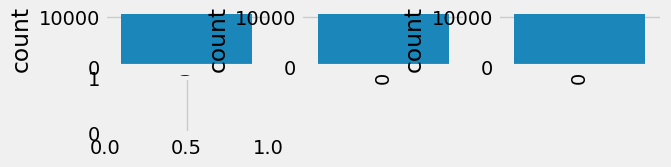

In [ ]:
for i in categorical:
    plt.subplot(6,3,c)
    sns.countplot(data[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c=c+1


In [ ]:
plt.show()

<Axes: xlabel='Price', ylabel='Density'>

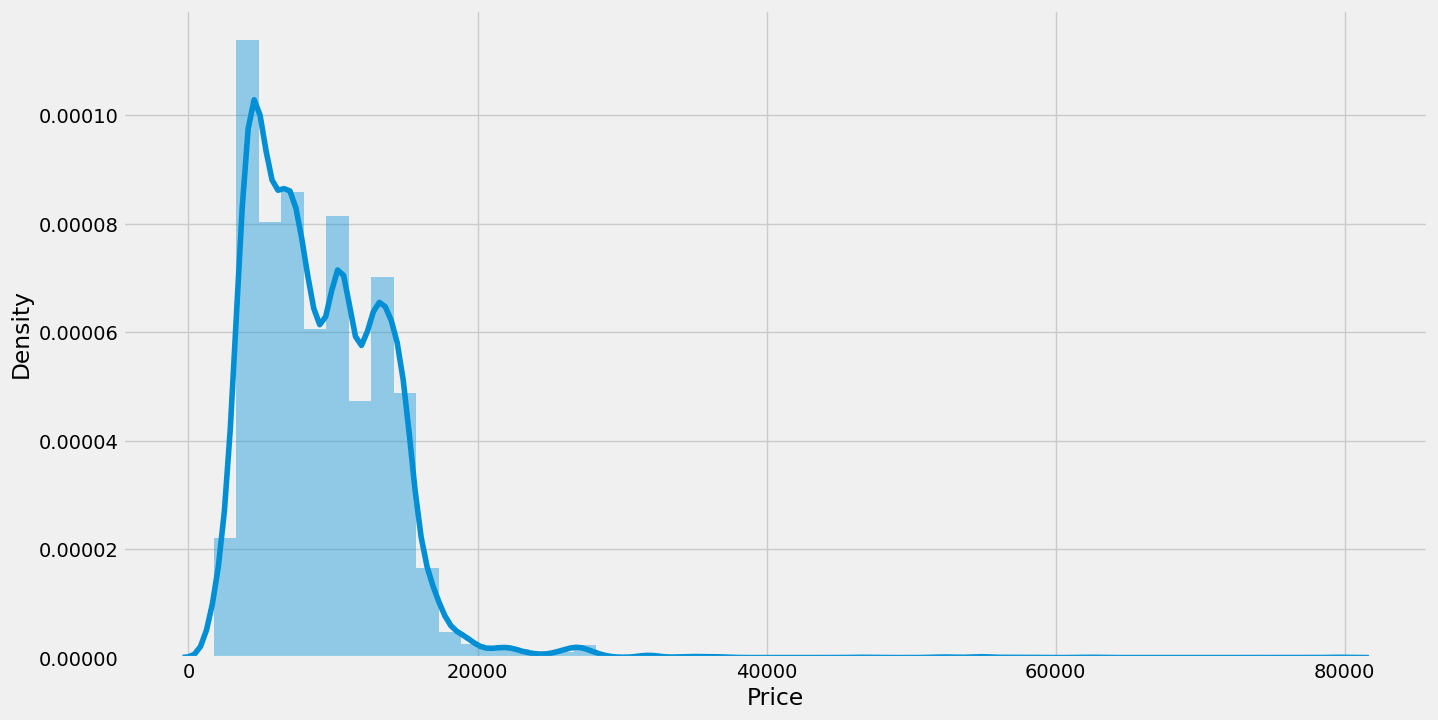

In [ ]:
#Distribution of 'PRICE' Column
plt.figure(figsize=(15,8))
sns.distplot(data.Price)

In [ ]:
sns.heatmap(data.corr(annot=True))


TypeError: ignored

<Axes: >

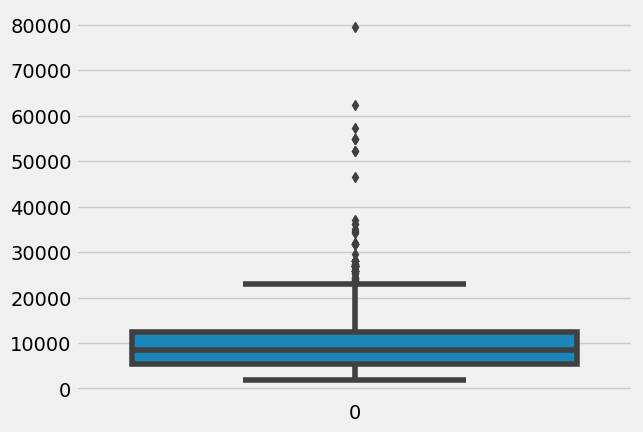

In [ ]:
#Detecting the Outliers
import seaborn as sns
sns.boxplot(data['Price'])

In [ ]:
y=data['Price']
x=data.drop(columns=['Price'],axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [ ]:
x_scaled=ss.fit_transform

In [ ]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.head()

ValueError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [47]:
for i in [knn,svr,dt]:
    i.fit(x_train,y_train)
    y_pred-i.predict(x_test)
    test_score=r2_score(y_test,y_pred)
    train_score=r2score(y_train,i.predict(x_train))
    if abs(train_score-test_score)<=0.1:
       print(i)
print('R2 Score is',r2_score(y_test,y_pred))
print('R2 Score for train data',r2_score(y_train,i,predict(x_train)))
print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
print('Mean squared Error is',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error is',(mean_squared_error(y_test,y_pred,squared=False)))

NameError: ignored

In [48]:
from sklearn.model_selection import cross_val_score
for i in range(2,5):
    cv=cross_val_score(rfr,x,y,cv=i)
    print(rfr,cv.mean())

NameError: ignored

In [49]:
import pickle
pickle.dump(rfr,open('model1.pkl','wb'))


NameError: ignored